<h1>The Sparks Foundation :- GRIP</h1>
Topic :- Prediction Using Unsupervised ML<br>
Author :- UPPARA NAVEEN KUMAR <br>
K-Means Clustering<br>

    In this task, we will predict the optimum number of clusters in Iris-dataset and represnt it visually.



In [1]:

# Importing all required libraries

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the iris dataset

from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
# Visualising Iris-dataset corresponding to Feature-Names 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
k_rng = range(1,11)

In [9]:
# Importing KMeans Library

from sklearn.cluster import KMeans

In [10]:
wcss =[]
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0 )
    km.fit(x)
    wcss.append(km.inertia_)

C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

In [11]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.472230158730156,
 39.03998724608725,
 34.29971212121212,
 30.063110617452722,
 28.271721728563833,
 26.094324740540415]

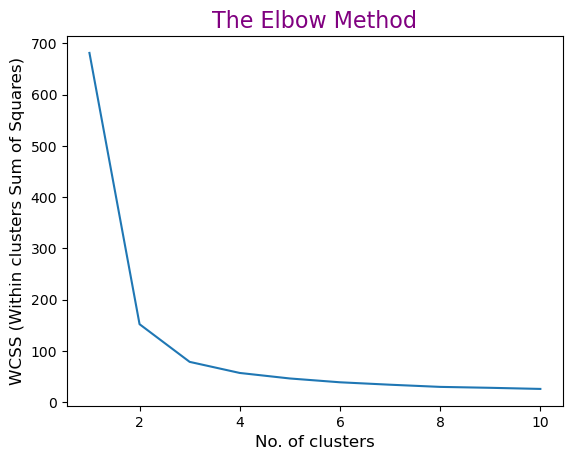

In [13]:
plt.plot(k_rng, wcss)
plt.title("The Elbow Method", size=16, color='purple')
plt.xlabel("No. of clusters", size=12)
plt.ylabel("WCSS (Within clusters Sum of Squares)", size=12)
plt.show()

1. You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
2.From this we choose the number of clusters as '3'.



In [14]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(x)

C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

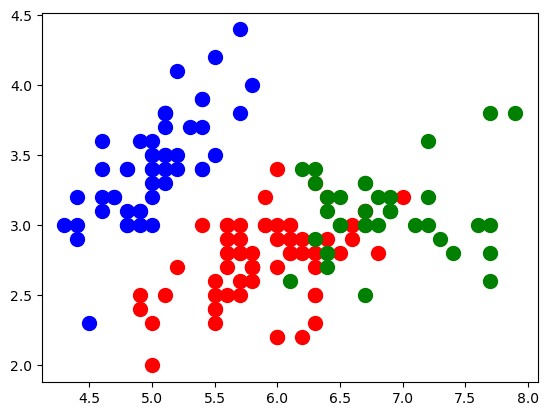

In [16]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

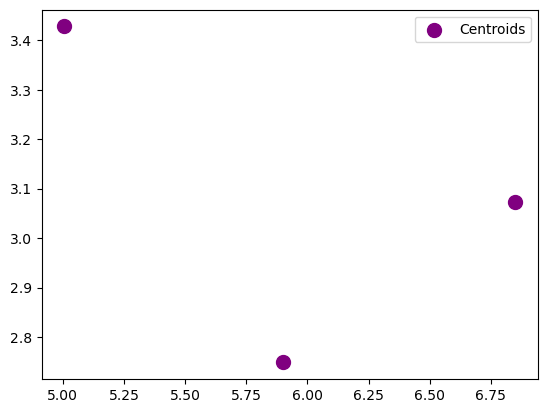

In [17]:
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'purple', label = 'Centroids')
plt.legend()